In [1]:
from bs4           import BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.error   import URLError

In [11]:
try :
    html = urlopen('https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx')
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else :
    soup = BeautifulSoup(html.read() , 'html.parser') 
    

In [13]:
table = soup.find('table' , {'class' : 'tData01 tt'})
table

<table cellpadding="0" cellspacing="0" class="tData01 tt" summary="선수 기본기록으로 경기,타석,타수,득점,안타,2루타, 3루타 등을 표시합니다">
<colgroup>
<col width="50"/>
<col width="80"/>
<col width="50"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="60"/>
<col width="60"/>
</colgroup>
<thead>
<tr>
<th>순위</th>
<th>선수명</th>
<th>팀명</th>
<th><a href="javascript:sort('HRA_RT');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타율">AVG</a></th>
<th><a href="javascript:sort('GAME_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="경기">G</a></th>
<th><a href="javascript:sort('PA_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타석">PA</a></th>
<th><a href="javascript:sort('AB_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타수">AB</a></th>
<th><a href="javascript:sort('RUN_CN');" onmouseenter="tooltip(t

In [ ]:
# player , bat_avg , hit , homerun , rbi
# csv 파일 저장
# 시각화
# DB 입력


In [14]:
#데이터를 저장할 리스트 생성
data = []   

for tr in table.find_all('tr'):
    tds = list(tr.find_all('td'))   
    
    for td in tds:
        
        if td.find('a'):    
            
            #<a> 태그 안에서 선수 이름을 가져옴
            player = td.find('a').text
            
            #<td> 태그 리스트의 '네 번째'(인덱스 3)에서 타율을 가지고 온다.
            bat_average = tds[3].text        
            
            #<td> 태그 리스트의 '아홉번째'(인덱스 8)에서 안타를 가져온다.
            hit = tds[8].text
            
            #<td> 태그 리스트의 '열두번째'(인덱스 11)에서 홈런을 가져온다.
            homerun = tds[11].text
            
            #<td> 태그 리스트의 '열네번째'(인덱스 13)에서 타점을 가져온다.
            RBI = tds[13].text               
            
            #data 리스트에 선수, 타율, 안타를 추가
            data.append([player, bat_average, hit, homerun, RBI])  


In [15]:
data

[['최형우', '0.354', '185', '28', '115'],
 ['손아섭', '0.352', '190', '11', '85'],
 ['로하스', '0.349', '192', '47', '135'],
 ['박민우', '0.345', '161', '8', '63'],
 ['페르난데스', '0.340', '199', '21', '105'],
 ['이정후', '0.333', '181', '15', '101'],
 ['허경민', '0.332', '145', '7', '58'],
 ['김현수', '0.331', '181', '22', '119'],
 ['강백호', '0.330', '165', '23', '89'],
 ['양의지', '0.328', '151', '33', '124'],
 ['나성범', '0.324', '170', '34', '112'],
 ['황재균', '0.312', '169', '21', '97'],
 ['김동엽', '0.312', '129', '20', '74'],
 ['오재일', '0.312', '147', '16', '89'],
 ['구자욱', '0.307', '137', '15', '78'],
 ['최주환', '0.306', '156', '16', '88'],
 ['터커', '0.306', '166', '32', '113'],
 ['박석민', '0.306', '109', '14', '63'],
 ['이명기', '0.306', '146', '2', '45'],
 ['김하성', '0.306', '163', '30', '109'],
 ['김상수', '0.304', '123', '5', '47'],
 ['박건우', '0.304', '148', '14', '70'],
 ['오지환', '0.300', '158', '10', '71'],
 ['정수빈', '0.298', '146', '5', '59'],
 ['조용호', '0.296', '121', '0', '32'],
 ['정훈', '0.295', '121', '11', '58'],
 ['채은성', 

In [38]:
with open('2020KBObatter.csv', 'w', encoding="utf-8") as file:       
    # 컬럼 이름 추가
    file.write('player,bat_average,hit,homerun,RBI\n')            
    
    # data를 반복하면서  선수이름,타율,안타수를 줄 단위로 저장
    for idx in data:                                   
        file.write('{},{},{},{},{}\n'.format(idx[0], idx[1], idx[2], idx[3], idx[4]))

In [39]:
%matplotlib inline
import pandas as pd          
import matplotlib as mpl     
import matplotlib.pyplot as plt

kboDF = pd.read_csv('./2020KBObatter.csv' , index_col='player' , encoding='utf-8')
kboDF

,bat_average,hit,homerun,RBI
player,,,,
최형우,0.354,185,28,115
손아섭,0.352,190,11,85
로하스,0.349,192,47,135
박민우,0.345,161,8,63
페르난데스,0.340,199,21,105
이정후,0.333,181,15,101
허경민,0.332,145,7,58
김현수,0.331,181,22,119
강백호,0.330,165,23,89


In [40]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [41]:
kboDF.columns

Index(['bat_average', 'hit', 'homerun', 'RBI'], dtype='object')

<Figure size 432x288 with 0 Axes>

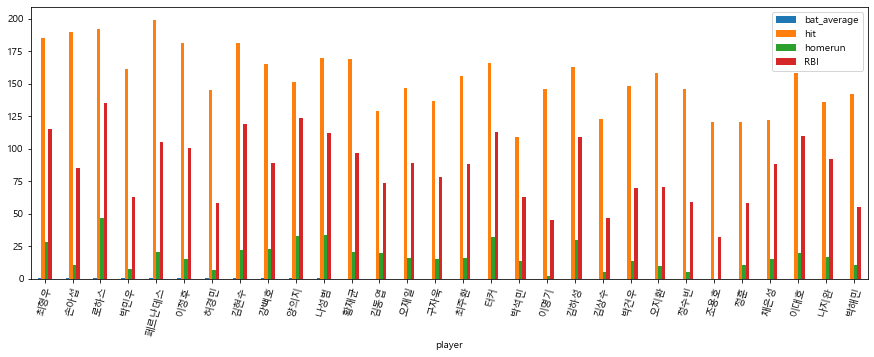

In [50]:
plt.figure()

kboDF.plot.bar(rot=75 , figsize=(15,5))

plt.show()
plt.close()

#### image scraping

In [51]:
from urllib.parse import quote_plus

In [81]:
baseUrl       = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
searchKeyword = input('검색어 입력 : ')
maxCnt        = int(input('scraping num : '))

url = baseUrl+quote_plus(searchKeyword)

try :
    html = urlopen(url) 
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser') 
    
soup

검색어 입력 : 강아지
scraping num : 30


<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="강아지 : 네이버 이미지검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'강아지'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'강아지'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>강아지 : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210304.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sst

In [84]:
# //*[@id="main_pack"]/section/div[2]/div[1]/div[1]/div[1]/div/div[1]/a/img
soup.find_all('img', '_image _listImage')

[]

In [85]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210309'
try :
    html = urlopen(url) 
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser') 

soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20210309" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [98]:
# 영화명
# text , string  ,get_text()
soup.find_all('div' , 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=151196" title="원더">원더</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=196843" title="극장판 바이올렛 에버가든">극장판 바이올렛 에버가든</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=134899" title="동주">동주</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=18543" title="서유기 2 - 선리기연">서유기 2 - 선리기연</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=194334" title="부활: 그 증거">부활: 그 증거</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=184517" title="소울">소울</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=31726" title="엽기적인 그녀">엽기적인 그녀</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=150376" title="나, 다니엘 블레이크">나, 다니엘 블레이크</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=196051" title="극장판 귀멸의 칼날: 무한열차편">극장판 귀멸의 칼날: 무한열차편</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?

In [99]:
# 평점
soup.find_all('td' , 'point')

[<td class="point">9.51</td>,
 <td class="point">9.50</td>,
 <td class="point">9.37</td>,
 <td class="point">9.36</td>,
 <td class="point">9.34</td>,
 <td class="point">9.31</td>,
 <td class="point">9.29</td>,
 <td class="point">9.28</td>,
 <td class="point">9.27</td>,
 <td class="point">9.22</td>,
 <td class="point">9.21</td>,
 <td class="point">9.20</td>,
 <td class="point">9.17</td>,
 <td class="point">9.12</td>,
 <td class="point">9.10</td>,
 <td class="point">9.06</td>,
 <td class="point">8.97</td>,
 <td class="point">8.95</td>,
 <td class="point">8.93</td>,
 <td class="point">8.92</td>,
 <td class="point">8.91</td>,
 <td class="point">8.88</td>,
 <td class="point">8.79</td>,
 <td class="point">8.79</td>,
 <td class="point">8.79</td>,
 <td class="point">8.76</td>,
 <td class="point">8.74</td>,
 <td class="point">8.71</td>,
 <td class="point">8.60</td>,
 <td class="point">8.55</td>,
 <td class="point">8.54</td>,
 <td class="point">8.53</td>,
 <td class="point">8.48</td>,
 <td class

In [102]:
# 영화명 , 평점을 담는 리스트 생성하라
# list comprehension
# len(soup.find_all('td' , 'point'))

movie_list = [ soup.find_all('div' , 'tit5')[n].a.string for n in range(0 , 50)]
point_list = [ soup.find_all('td'  , 'point')[n].string for n in range(0 , 50)]

In [105]:
# len(movie_list)
# len(point_list)
point_list

['9.51',
 '9.50',
 '9.37',
 '9.36',
 '9.34',
 '9.31',
 '9.29',
 '9.28',
 '9.27',
 '9.22',
 '9.21',
 '9.20',
 '9.17',
 '9.12',
 '9.10',
 '9.06',
 '8.97',
 '8.95',
 '8.93',
 '8.92',
 '8.91',
 '8.88',
 '8.79',
 '8.79',
 '8.79',
 '8.76',
 '8.74',
 '8.71',
 '8.60',
 '8.55',
 '8.54',
 '8.53',
 '8.48',
 '8.32',
 '8.21',
 '8.19',
 '8.18',
 '8.11',
 '8.03',
 '8.02',
 '8.00',
 '7.95',
 '7.92',
 '7.92',
 '7.77',
 '7.67',
 '7.66',
 '7.62',
 '7.20',
 '7.14']

In [108]:
# 날짜 생성(50) 오늘날짜를 기준으로 50일 
# pd.date_range() 
# 날짜 , 영화명 , 포인트 DataFrame 생성

date_list = pd.date_range('2021-3-10' , periods=50)

movieDF = pd.DataFrame({
    '날짜'   : date_list , 
    '영화명' : movie_list , 
    '포인트' : point_list
})
movieDF.head()

,날짜,영화명,포인트
0,2021-03-10,원더,9.51
1,2021-03-11,극장판 바이올렛 에버가든,9.50
2,2021-03-12,동주,9.37
3,2021-03-13,서유기 2 - 선리기연,9.36
4,2021-03-14,부활: 그 증거,9.34


In [109]:
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      50 non-null     datetime64[ns]
 1   영화명     50 non-null     object        
 2   포인트     50 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.3+ KB


In [111]:
movieDF['포인트'] = movieDF['포인트'].astype(float)
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      50 non-null     datetime64[ns]
 1   영화명     50 non-null     object        
 2   포인트     50 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.3+ KB


In [113]:
movieDF.sort_values(by='포인트' , ascending=False , inplace=True) 

In [114]:
# 영화별 평점 시각화, MongoDB 입력
movieDF

,날짜,영화명,포인트
0,2021-03-10,원더,9.51
1,2021-03-11,극장판 바이올렛 에버가든,9.50
2,2021-03-12,동주,9.37
3,2021-03-13,서유기 2 - 선리기연,9.36
4,2021-03-14,부활: 그 증거,9.34
5,2021-03-15,소울,9.31
6,2021-03-16,엽기적인 그녀,9.29
7,2021-03-17,"나, 다니엘 블레이크",9.28
8,2021-03-18,극장판 귀멸의 칼날: 무한열차편,9.27
9,2021-03-19,똥파리,9.22


#### 스크랩핑 실습 & 워드클라우드

In [115]:
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'
try :
    html = urlopen(url) 
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser' , from_encoding='utf-8') 

soup


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///title/tt4154756?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Avengers: Infinity War (2018) - Avengers: Infinity War (2018) - User Reviews - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitl

- 점수(별점) , 리뷰제목 , 작성자 닉네임, 작성날짜, 리뷰내용

In [122]:
soup.find_all('div' , {'class' : 'imdb-user-review'} )

[<div class="lister-item mode-detail imdb-user-review collapsable" data-review-id="rw6506593" data-vote-url="/title/tt4154756/review/rw6506593/vote/interesting">
 <div class="review-container">
 <div class="lister-item-content">
 <a class="title" href="/review/rw6506593/"> A film that pulled off the impossible.
 </a> <div class="display-name-date">
 <span class="display-name-link"><a href="/user/ur89226807/">cartermain</a></span><span class="review-date">20 January 2021</span>
 </div>
 <div class="content">
 <div class="text show-more__control">Avengers: Infinity War is a film that should be utter crap. A franchise stretching almost twenty films is unheard of. And making a great and satisfying climax to that franchise is nearly impossible. Considering how many characters Marvel had to juggle together with this movie, there was almost no way this movie wouldn't suck.<br/><br/>But it didn't. Marvel pulled it off. All of the characters were balanced seemingly effortlessly. The action was 

### 자연어 처리
- JDK 설치 및 JAVA_HOME
- conda install konlpy 안될경우  pip install konlpy
 
- (cmd)
- python
- >import nltk
- >nltk.download (stopwords , punkt) 

- (andconda prompt)
- conda install -c conda-forge jpype1

- 버전 해결책 https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype

- conda install -c conda-forge wordcloud

- conda install -c conda-forge gensim


In [5]:
from konlpy.tag import Kkma
from wordcloud  import WordCloud , STOPWORDS

In [6]:
kkoma = Kkma()

In [7]:
kkoma.nouns('한국어 문장 분석을 시작합니다. 설치가 어렵지만 재미 있을것 같다')

['한국어', '문장', '분석', '설치', '재미']

In [8]:
kkoma.sentences('한국어 문장 분석을 시작합니다. 설치가 어렵지만 재미 있을것 같다')

['한국어 문장 분석을 시작합니다.', '설치가 어렵지만 재미 있을 것 같다']

In [9]:
kkoma.pos('한국어 문장 분석을 시작합니다. 설치가 어렵지만 재미 있을것 같다')

[('한국어', 'NNG'),
 ('문장', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('설치', 'NNG'),
 ('가', 'JKS'),
 ('어렵', 'VA'),
 ('지만', 'ECE'),
 ('재미', 'NNG'),
 ('있', 'VV'),
 ('을', 'ETD'),
 ('것', 'NNB'),
 ('같', 'VA'),
 ('다', 'EFN')]

In [11]:
import numpy as np
from PIL import Image 

In [13]:
text = open('./data/07. alice.txt').read()
text

'癤풮roject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what i

In [19]:
maskImg = np.array(Image.open('./data/07. alice_mask.png'))
maskImg

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

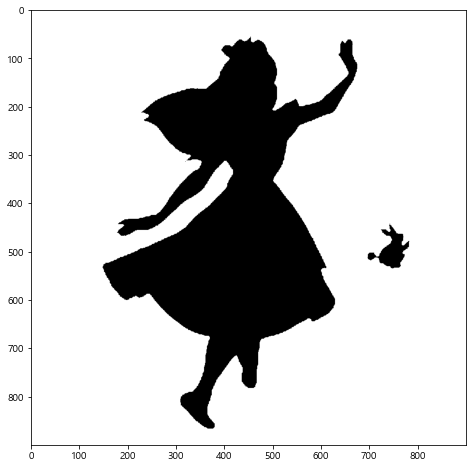

In [22]:
plt.figure(figsize=(8,8))
plt.imshow(maskImg , cmap=plt.cm.gray)
plt.show()

In [24]:
sw = set(STOPWORDS)
sw.add('said') 
wc = WordCloud(mask=maskImg , max_words=2000 , background_color='white')

In [26]:
wc = wc.generate(text) 

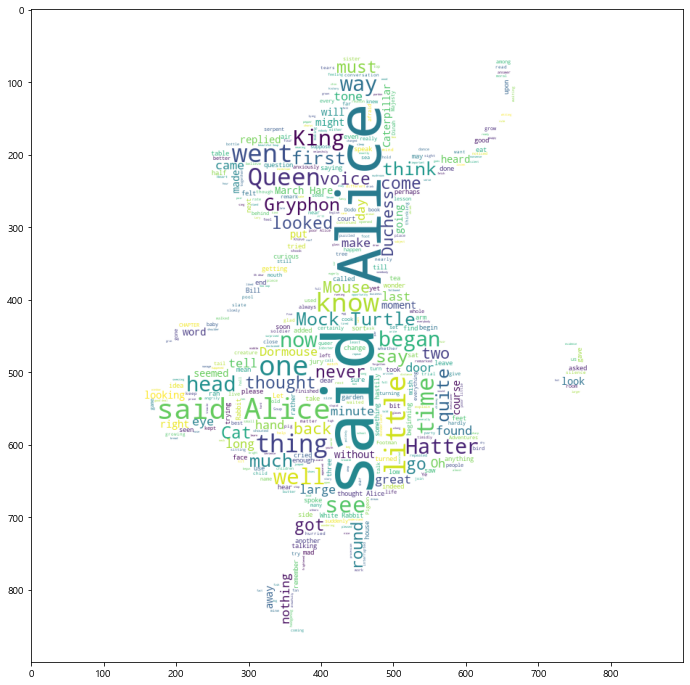

In [27]:
plt.figure(figsize=(12 , 12))
plt.imshow(wc)
plt.show()
plt.close()